Importeer de benodigde libraries

In [1]:
import os.path
import json
import math
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime


# Stap 1: Open en lezen van gemeente-veiligheidsregio's

In [2]:
with open('data/gemeente_veiligheidsregio.json', 'r') as f:
    regio_data = json.load(f)

# Stap 2: Voer een gemeente in en dan word de VR (veiligheidsregios) van die gemeente opgezocht

In [3]:
regios = ''
while not regios: # Nu kun je niet een niet bestaande stad invullen
    gemeente = input("Geef uw gemeente op: ")
    gemeente = gemeente.capitalize()  # Eerste letter = caps
    print('')  # Beetje whitespace tussen de teksten door
    regios = [x for x in regio_data if x['name'] == gemeente]
regio = regios[0]['safetyRegion']
print("De veiligheidsregio nummer van " + gemeente + " is: " + regio)
print('')  # Beetje whitespace tussen de teksten door
# VR van Groningen = VR01

Geef uw gemeente op: groningen

De veiligheidsregio nummer van Groningen is: VR01



# Stap 3: Welke steden zitten er allemaal in dezelfde VR?

In [4]:
gemeentes = [x for x in regio_data if x['safetyRegion'] == regio]
print("Gemeentes in deze regio: ")
for number, ss in enumerate(gemeentes):
    print(number+1, '\t' + ss['name'])  # Wil niet dat lijst bij '0' beginnen vandaar +1
print('')  # Beetje whitespace tussen de teksten door

Gemeentes in deze regio: 
1 	Appingedam
2 	Delfzijl
3 	Groningen
4 	Het Hogeland
5 	Loppersum
6 	Midden-Groningen
7 	Oldambt
8 	Pekela
9 	Stadskanaal
10 	Veendam
11 	Westerkwartier
12 	Westerwolde



# Stap 4: Voer een datum in de format van yyyy-mm-dd en tussen 2020-09-01 en 2020-10-07

In [5]:
# Data ophalen en storen in arrays
file_name = 'data/{}.json'.format(regio)
with open(file_name, 'r') as f:
    data = json.load(f)

region_results = data['results_per_region']['values']

data_array = {
    'date_of_report_unix': [],
    'vrcode': [],
    'total_reported_increase_per_region': [],
    'infected_total_counts_per_region': [],
    'hospital_total_counts_per_region': [],
    'infected_increase_per_region': [],
    'hospital_increase_per_region': [],
    'infected_moving_avg_per_region': [],
    'hospital_moving_avg_per_region': [],
    'date_of_insertion_unix': []
}

# Setting dates array for date input verification
dates = []

for x in region_results:
    for key in x:
        if (key == 'date_of_report_unix'):
            data_array[key].append(x[key])

            unixDate = datetime.utcfromtimestamp(x[key]).strftime('%Y-%m-%d')
            dates.append(unixDate)
        else:
            data_array[key].append(x[key])

data_array_length = len(data_array['date_of_report_unix']) # is toch allemaal hetzelfde


# Stap 4: Voer een datum in de format van yyyy-mm-dd en tussen 2020-09-01 en 2020-10-07

In [6]:
datum = ''
while datum not in dates: # Je kunt alleen een bestaande datum vinden
    datum = input('Geef een geldige datum in het yyyy-mm-dd format op:') # we gebruiken deze format omdat dit ook zo in de data wordt gebruikt
    # waarom print hij al het volgende wanneer je niet een goede datum in vult? en toch blijft ie zeuren om een goede datum


Geef een geldige datum in het yyyy-mm-dd format op:2020-10-01


# Stap 5: Grafieken

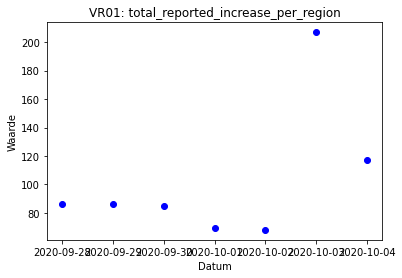

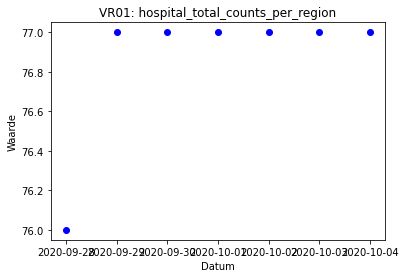

In [7]:
# we willen data laten van + 3 dagen en - 3 dagen laten zien
# plus wat checks zodat er altijd 7 dagen worden weergeven
dagen_offset_index = 3
datum_middle_index = dates.index(datum)
# als de middelste index lager is dan de offset dan wordt het de offset
# Dus als de gebruiker dag dag 2 of dag 3 van de hele data reeks somehow invuld dan willen we dat het opzchuift zodat we nog mooi 7 dagen kunnen zien
datum_middle_index = dagen_offset_index if datum_middle_index < dagen_offset_index else datum_middle_index

# hier er dus verder vor zorgen dat de 7 dagen goed geshowed worden
datum_max_index = (datum_middle_index + dagen_offset_index) if (datum_middle_index + dagen_offset_index) < data_array_length else (data_array_length - 1) # index
datum_min_index = (datum_max_index - 6) if (datum_max_index - 6) > 0 else 0 # 7 days in a week en 1 index ding


x = dates[datum_min_index:datum_max_index + 1] # wil niet dat ie de laatste exclude
y = data_array['total_reported_increase_per_region'][datum_min_index:datum_max_index + 1] # wil niet dat ie de laatste exclude
plt.title(regio + ": total_reported_increase_per_region")  # dus niet de gemeente! dat is niet logisch
plt.xlabel("Datum") 
plt.ylabel("Waarde") 
plt.plot(x,y,"ob") 
plt.show()

x = dates[datum_min_index:datum_max_index + 1] # wil niet dat ie de laatste exclude
y = data_array['hospital_total_counts_per_region'][datum_min_index:datum_max_index + 1] # wil niet dat ie de laatste exclude
plt.title(regio + ": hospital_total_counts_per_region") # dus niet de gemeente! dat is niet logisch
plt.xlabel("Datum") 
plt.ylabel("Waarde") 
plt.plot(x,y,"ob") 
plt.show()